Social Media Sentiment Analysis using Twitter Dataset.

In [43]:
#Importing the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
#Twitter credentials/Authentication
consumerKey = "zoHXzUHOH3rmxRGD6BTH6g23q"
consumerSecret = "8pvYlslJUX5uOP3cH3x194QcAIxEOqyW6hq4kSDFXNOH6en1Ou"
accessToken = "1108752665125814273-ejbIeMyJNmcQtZLAeUD0wVkYCOtchI"
accessTokenSecret = "4nTMyymdRQcgC4GeLNQmYfoTsFGzOK7DwY0EcMEEt29Po"

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [45]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "Rambofight", count = 100, lang = "en", tweet_mode = "extended")

#Printing last 5 tweets
print("show the 5 recent tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i+=1

show the 5 recent tweets: 

1) @RaCSGO 10:27 CEST, 80 minutes ago https://t.co/N79dijPGrt

2) @RaCSGO This guy bought mine about 1 hour ago on buff, he has 2x Hot Rod and it looks like he will make it 4x

https://t.co/yVgSNmL1xC https://t.co/is1kVhagg1

3) @Alkem1stCSGO @RaCSGO sold some boosters some time ago, maybe he is also into the cards itself?

4) @OfficialBaldie Most skins went up 3%+ the past couple of days, they definitely dont just stay the same all around

5) @ExerpasCSGO @Alkem1stCSGO Yes, a week ago already...



In [46]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,"@RaCSGO 10:27 CEST, 80 minutes ago https://t.c..."
1,@RaCSGO This guy bought mine about 1 hour ago ...
2,@Alkem1stCSGO @RaCSGO sold some boosters some ...
3,@OfficialBaldie Most skins went up 3%+ the pas...
4,"@ExerpasCSGO @Alkem1stCSGO Yes, a week ago alr..."


In [47]:
#Cleaning the text

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing @mentions
  text = re.sub(r'#', '', text) #removing '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RTs
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlinks

  return text
df['Tweets']=df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"10:27 CEST, 80 minutes ago"
1,This guy bought mine about 1 hour ago on buff...
2,"sold some boosters some time ago, maybe he i..."
3,Most skins went up 3%+ the past couple of day...
4,"Yes, a week ago already..."
...,...
95,Some of my favourite recent pickups 🤩\n\nFN Ki...
96,Steamtrades up for 5 minutes and already secur...
97,!!!!!!!!!!!🤩
98,Done ☑️


In [48]:
#Subjectivity/Polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"10:27 CEST, 80 minutes ago",0.00000,0.0000
1,This guy bought mine about 1 hour ago on buff...,0.85000,0.2500
2,"sold some boosters some time ago, maybe he i...",0.00000,0.0000
3,Most skins went up 3%+ the past couple of day...,0.34375,0.0625
4,"Yes, a week ago already...",0.00000,0.0000
...,...,...,...
95,Some of my favourite recent pickups 🤩\n\nFN Ki...,0.25000,0.0000
96,Steamtrades up for 5 minutes and already secur...,0.00000,0.0000
97,!!!!!!!!!!!🤩,0.00000,0.0000
98,Done ☑️,0.00000,0.0000


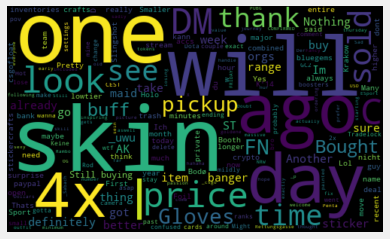

In [49]:
#WordCloud
allWords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [50]:
#Sentiment Analysis (positive/negative/neutral)
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"10:27 CEST, 80 minutes ago",0.00000,0.0000,Neutral
1,This guy bought mine about 1 hour ago on buff...,0.85000,0.2500,Positive
2,"sold some boosters some time ago, maybe he i...",0.00000,0.0000,Neutral
3,Most skins went up 3%+ the past couple of day...,0.34375,0.0625,Positive
4,"Yes, a week ago already...",0.00000,0.0000,Neutral
...,...,...,...,...
95,Some of my favourite recent pickups 🤩\n\nFN Ki...,0.25000,0.0000,Neutral
96,Steamtrades up for 5 minutes and already secur...,0.00000,0.0000,Neutral
97,!!!!!!!!!!!🤩,0.00000,0.0000,Neutral
98,Done ☑️,0.00000,0.0000,Neutral


In [51]:
#Positive Tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j+=1

1)  This guy bought mine about 1 hour ago on buff, he has 2x Hot Rod and it looks like he will make it 4x

 

2)  Most skins went up 3%+ the past couple of days, they definitely dont just stay the same all around

3)  Been following you since the early Penta days in 2017, what a journey so far! Very inspiring to see your passion and skill over the years, but I hope there is still more to come?

Sad to see PUBG ESport losing one of its OG orgs, but sadly its not a surprise

4) Nothing better than starting the day with a massive banger deal 🤩

Still buying all your skins for bank / paypal / crypto 🤝
DMs are always open! 📩
Any price range, no minimum value! 💸 

5)  You're welcome 

6)  MAID STREAM ON FRIDAY CONFIRMED 🤩

7)   I see we had the same thought, but I actually painted it myself hahaha 

8)  Fancy sexy maid outfit 😏😏

9)   _uwu   You better be ordering one already

10)   This one should be your old one:


11)  Thats exactly what I said

12)  Pretty sure tokens are included in tha

In [52]:
#Negative Tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j+=1

1) Is Dota Tradelock always ending the exact hour you got the item and not at the same time each day like with CS Skins?

Im mildly confused 🧐 

2) _ I would probably lose 5 ranks with such small pov 🤣

3) _ wtf are these camera settings

4)    Im afraid your info on that is outdated

5)   Booth is the guy you buy your weapons from ingame every round, he is featured in a bunch of skin descriptions as "Booth, Arms Dealer"

6)  First Account with a custom URL and not fitting the name scheme, but not less shady:



7) Currently traveling to Bodø/Meløy, 🇳🇴
where I will be attending the  TrackMania tournament this weekend.

Still buying all your skins, just expect slightly longer response times 🥰 

8) Looking to buy some banger lowtier stickercrafts in the 5-200€ range! 

Link me your buff stores / inventories and I will take a look 🥰

Not interested in any K'14 

9)   Got them a few days ago, but quality is saddening



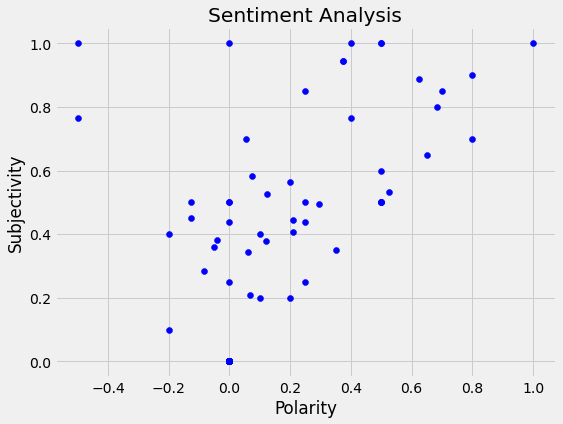

In [53]:
#Plotting Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [54]:
#Percentage of Positive Tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) *100, 1)

37.0

In [55]:
#Percentage of Negative Tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / df.shape[0]) *100, 1)

9.0

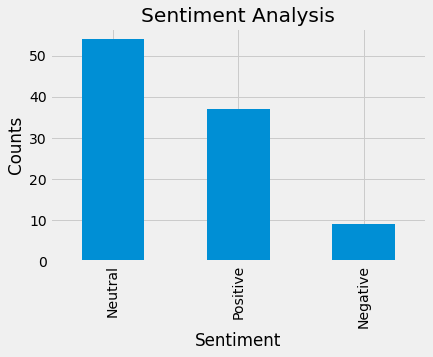

In [56]:
#Bar Graph
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()